# Arbre de décision

## Choix du point de coupure
Pour construire l’arbre, l’algorithme doit choisir quelle est la prochaine variable qui sera utilisée et quelle valeur servira de point de coupure.

le but est de la coupure est de rendre chaque feuille plus "Pure". Il y a deux façon de calculer la purité:

1. Gini : calcule le pourcentage de classifications fausses dans le cas du choix de la classe majoritaire pour toutes les données. L’objectif est d’arriver à une valeur la plus proche de 0 possible, signifiant que toutes les données sont de la classe majoritaire et qu’il n’y a donc aucune erreur. Sa valeur maximale est de 0.5 en classification binaire, correspondant à deux classes présentes à égalité, donc une impureté « totale ».
2. Entropie : le calcul est un peu plus complexe que pour Gini et donc plus gourmand. Il s’agit de calculer le log2 des probabilités. La principale différence avec Gini est que l’entropie est comprise entre 0 (nœud pur) et 1 (nœud complètement impur).


Dans l’implémentation de Scikit-learn, ces deux paramètres se choisissent via criterion (gini ou entropy) et splitter (best ou random).

## Critères d’arrêt
1. Profondeur maximale (**max_depth**)
2. Nombre minimal d’enregistrements d’un nœud pour le couper (**min_samples_split**)
3. Nombre minimal d’enregistrements dans une feuille (**min_samples_leaf**) : si une coupure menait à une feuille possédant moins d’enregistrements que ce nombre, **la coupure est annulée et le nœud devient une feuille**. Il existe une version pondérée (min_weight_fraction_leaf) utile si certains enregistrements doivent avoir plus d’importance que d’autres.
4. Nombre maximal de features à prendre en compte à chaque split potentiel (**max_features**).
5. Nombre maximal de feuilles (**max_leaf_nodes**) pour l’arbre dans sa totalité.
6. Gain minimum pour qu’une coupure soit effectuée (**min_impurity_drecrease**).
7. Impureté minimale pour effectuer un split (**min_impurity_split**).

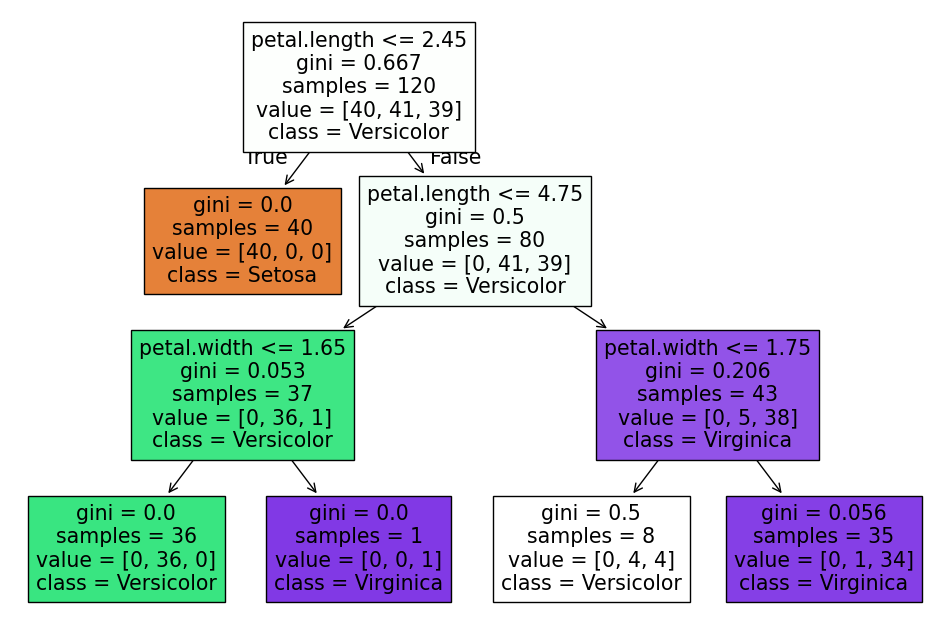

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Charger les données
iris_df = pd.read_csv("iris.csv")
X = iris_df.drop(columns='variety')
y = iris_df['variety']

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Créer et entraîner le modèle
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(X_train, y_train)

# Affichage de l'arbre
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier,
          filled=True,
          feature_names=X.columns,
          class_names=tree_classifier.classes_)
plt.show()

# Random Forests

Les arbres de décision ont de nombreux avantages pour les problèmes simples, mais pour les problèmes complexes, il est préférable d'utiliser random forests pour obtenir de bons résultats.

Le principe est de créer de multiples arbres sur des sous-ensembles de données.

Lors de la prédiction, la moyenne des prédictions de chaque arbre est effectuée. La forêt renvoie alors soit la classe majoritaire (**predict**), soit les probabilités associées à chaque classe (**predict_proba**).

Dans la librairie Scikit-learn, on utilise **RandomForestClassifier**. Elle prend les mêmes paramètres que les arbres de décision auxquels se rajoute le nombre d’estimateurs (**n_estimators**).

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Charger les données
titanic_df = pd.read_csv("titanic.csv")

# Prétraitement minimal : supprimer les colonnes non numériques
titanic_df = titanic_df.select_dtypes(include=['number'])  # garde seulement les colonnes numériques

# Séparer features et cible
y = titanic_df['Survived']
X = titanic_df.drop(['PassengerId', 'Survived'], axis=1)

# Séparer en train/test
train_X_titanic, test_X_titanic, train_y_titanic, test_y_titanic = train_test_split(X, y, train_size=0.8, random_state=42)

# Modèle
random_forest = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
random_forest.fit(train_X_titanic, train_y_titanic)

# Prédictions
pred_y_titanic = random_forest.predict(test_X_titanic)

# Rapport
print(classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        50
           1       0.78      0.21      0.33        34

    accuracy                           0.65        84
   macro avg       0.71      0.58      0.55        84
weighted avg       0.70      0.65      0.59        84



In [35]:
#Il est possible d’accéder à chacun des arbres de la forêt via son attribut estimators_. L’importance relative des variables est obtenue avec **feature_importances_** :

random_forest.feature_importances_

array([0.04900671, 0.31007881, 0.08511899, 0.11196803, 0.44382746])

In [36]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


# Analyse
1. Le modèle atteint une précision globale (accuracy) de 65%.
2. Il est très performant pour détecter les non-survivants (0), avec un rappel (recall) de 96%.
3. En revanche, il échoue à bien prédire les survivants (1), avec un rappel de seulement 21%, ce qui indique un fort déséquilibre.
4. Les variables utilisées par le modèle sont : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'].
5. L’attribut feature_importances_ montre que la variable Fare (prix du billet) reçoit 44.4% de l’attention du modèle, ce qui en fait la plus influente.
6. On peut conclure que le modèle apprend une corrélation entre prix du billet élevé (souvent associé à la 1ère classe) et probabilité de survie plus élevée.

# XGBoost (eXtreme Gradient Boosting)
Comme pour les forêts aléatoires, il s’agit de créer de multiples arbres, mais ils sont créés séquentiellement: : chaque donnée d’apprentissage aura une probabilité d’être choisie pour le prochain arbre, etc.

Avec Scikit-learn, on utilise **GradientBoostingClassifier**
https://xgboost.readthedocs.io/en/latest/

Pour effectuer du boosting, il faut préciser la méthode de sélection des données comme étant la descente de gradient (**gradient_based**).

In [37]:
import sklearn
import xgboost

xgboost_titanic = xgboost.XGBClassifier(max_depth=5, subsample=0.7, sampling_method='uniform', seed=42, n_estimators=20, eval_metric='logloss')

xgboost_titanic.fit(train_X_titanic, train_y_titanic)

pred_y_titanic = xgboost_titanic.predict(test_X_titanic)

print(sklearn.metrics.classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        50
           1       0.52      0.32      0.40        34

    accuracy                           0.61        84
   macro avg       0.58      0.56      0.55        84
weighted avg       0.59      0.61      0.58        84



In [38]:
xgboost_titanic.feature_importances_

array([0.166654  , 0.18252459, 0.20115879, 0.20115627, 0.24850638],
      dtype=float32)

# Analyse comparative : Random Forest vs XGBoost
En comparant XGBoost à Random Forest, on observe que le score global (accuracy) diminue légèrement, mais que le modèle repère mieux les survivants (classe 1) :

Rappel pour 1 : de 0.21 à 0.32 -> amélioration
Rappel pour 0 : de 0.94 à 0.80 -> baisse

Accuracy globale : de 0.64 à 0.61 → légère baisse

Cela montre un meilleur équilibre entre les classes, même si le score global en souffre.

XGBoost est un modèle plus puissant, mais souvent moins tolérant au bruit.

Contrairement à Random Forest, il est plus sensible aux classes minoritaires, ce qui le rend intéressant dans les cas de déséquilibre de classe, comme ici (plus de morts que de survivants).

Ce peut être un bon comportement si l’objectif est de ne pas négliger les cas rares, mais importants (comme les survivants).